In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import math


# Computational Exercise 8: Multipole Expansion

The goals of this exercise are to have you 1) explore the multipole expansion of different point charge distributions and 2) compare the resulting potential to the exact potential. By doing this comparison, you should gain a greater understanding of what the different multipole moments represent and a better appreciation for how multipole expansion can be used to simplify a complex potential.

## a) Calculate the exact potential

Your first step is to write code to calculate the exact potential generated by point charges. You will later perform the multipole expansion on this potential.

**First, define a function that will take an array of charges and their locations and return the potential, `V`, at a location `r0`.** This should look very similar to code you've written before for this purpose but for multiple charges instead of one.

*Hint 1: your function should include a for-loop that iterates over each charge.*

*Hint 2: initialize the total potential as a variable set to zero. Then use the for-loop from Hint 1 to add the contribution of each charge to the total potential at* `r0`.


In [2]:
"""
This function should take q (an array of charges), q_loc (an array of locations in the form [x, y]), 
and r0 (the point of interest you're calculating the potential at). 

The result should be the potential at r0.
"""
def V(q, q_loc, r0):
    epsilon_0 = 8.8541878128e-12
    
    V_total = 0
    for i in range(len(q)):
    # Add code to calculate the potential at r0 produced by each of the charges
    #/
        sep = np.subtract(r0, q_loc[i]) #Find separation vector
        mag = np.linalg.norm(sep) #Magnitude of separation vector
        V_total += 1/(4*np.pi*epsilon_0)*q[i]/mag
    #/
    return V_total

**Next, set up some charges, and calculate the exact potential.** Much of the code below is already written, however, you will have to add the loops to calculate the potential at all the different locations. Remember that you did something similar to this in "Computational Exercise 2: Visualizing the Electric Field" to calculate the electric field at different locations.

In [3]:
# Define charges and locations of charges
q1 = 1
q1_loc = [10, 0]
q2 = -1
q2_loc = [-10, 0]
q3 = 0.5
q3_loc = [0, 2]

q = np.array([q1,q2,q3])
q_loc = np.array([q1_loc,q2_loc,q3_loc])

#Generate one-dimensional arrays for the x and y locations
res = 50
x = np.linspace(-100, 100, res)
y = np.linspace(-100, 100, res)

#Convert the 1D arrays to a 2D meshgrids
X, Y = np.meshgrid(x, y)

#Define the array within which the exact values of the potential will be stored
exactV = np.zeros((res, res))

# NOW, add code to calculate the exact potential for the locations in 
# X and Y using the function you previously wrote and storing the values
# in the variable exactV

#/
for i in range(res):
    for j in range(res):
        exactV[j, i] = V(q, q_loc, np.array([X[j, i], Y[j, i]]))
#/

In the past, we've used streamplots and quiver plots to show this data. **For this exercise, try using a [contour plot](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.contour.html) to show the potential**. Rather than showing vectors and directions, this type of plot shows equipotential lines.

This function takes arguments of the form <code>plt.contour(x, y, Z)</code> where x and y are our standard coordinate arrays and Z is the height, or potential in this case. To better see the shape of the potential, you'll want to put in the potential on a log scale, which you can do by applying [np.log10](https://numpy.org/doc/stable/reference/generated/numpy.log10.html) to the potential. (Note: `np.log10` applied to an array will compute the logarithm of each entry.) 

You'll also want to plot the data twice on the same figure, once with the log of the positive potential and once with the log of the potential multiplied by -1 (since the negative log is not defined). If you would like to distinguish between the negative and positive potentials, you can use different colormaps or linestyles (e.g. linestyles = 'dashed') in the different contour plots.

Additionally, prior to generating the plot, you should calculate the maximum and minimum values of $\log(|V|)$. `np.abs` returns the absolute value of each entry in an array, while `np.max` and `np.min` return the maximum and minimum elements respectively. You can then use these values to define a set of levels (equipotential values) for the contour plot to show. This won't actually change anything on the plot, but it'll be necessary later to keep the other plots on the same scaling. 

In sum, you should plot:

- The locations of each charge. Try to use the `color` function below to give positive and negative charges different colors.
- Two contour plots corresponding to positive and negative values of `exactV`.

*Hint: in order to not be thrown off by infinities produced by log(0), you can use* `np.nonzero(exactV)` *to return the non-zero elements.*

9.641458729845828 5.403199799853716


<ipython-input-4-a7faabb3e66d>:31: RuntimeWarning: invalid value encountered in log10
  ax1.contour(x, y, np.log10(exactV), levels = lvls) #vmax = logvmax,vmin = logvmin, levels= 10)
<ipython-input-4-a7faabb3e66d>:32: RuntimeWarning: invalid value encountered in log10
  ax1.contour(x, y, np.log10(-exactV), levels = lvls, linestyles = 'dashed') #vmax = logvmax,vmin = logvmin, levels = 10)


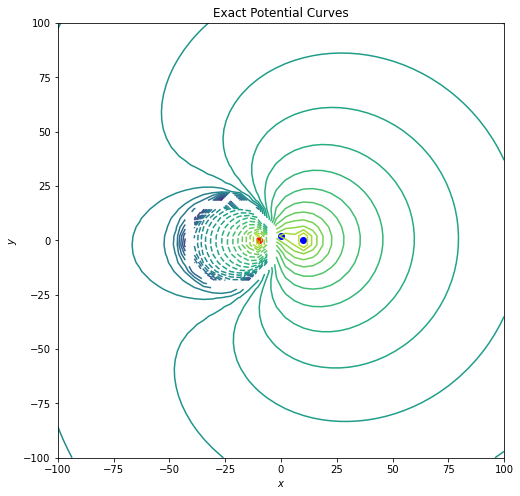

In [4]:

def color(q):
    """Bonus code to  make it easy to have negative and
    positive charges be different colors"""
    if np.sign(q) == 1:
        return 'b'
    else:
        return 'r'



nlevels = 30 # Set the number of levels to be used by the countour plot
logvmax = 0 # Write code to find the maximum of log(|V|) and set this parameter to it
logvmin = 0 # Write code to find the minimum of log(|V|)  and set this parameter to it
# Code to generate a list of levels. Use when calling contour, e.g. levels = lvls
lvls = np.linspace(math.floor(logvmin),math.ceil(logvmax),nlevels)

#/
logvmax = np.log10(np.max(np.abs(exactV[np.nonzero(exactV)])))
logvmin = np.log10(np.min(np.abs(exactV[np.nonzero(exactV)])))
print(logvmax,logvmin)
lvls = np.linspace(math.floor(logvmin),math.ceil(logvmax),nlevels)

fig1 = plt.figure(figsize=(8,8))
ax1 = fig1.add_subplot(111)
ax1.scatter(q1_loc[0], q1_loc[1], c=color(q1))
ax1.scatter(q2_loc[0], q2_loc[1], c=color(q2))
ax1.scatter(q3_loc[0], q3_loc[1], c=color(q3))
ax1.set_title("Exact Potential Curves")
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.contour(x, y, np.log10(exactV), levels = lvls) #vmax = logvmax,vmin = logvmin, levels= 10)
ax1.contour(x, y, np.log10(-exactV), levels = lvls, linestyles = 'dashed') #vmax = logvmax,vmin = logvmin, levels = 10)

plt.show()
#/

## b) Use multipole expansion to approximate the electric potential

Now that we've seen the exact potential, let's look at the multipole expansion and its components. For a collection of discrete charges, the equation for a potential as a sum to the $n^{\text{th}}$ degree multipole term is:

$$V(\vec{r}) = \sum_{n = 0}^\infty V_n(\vec{r})$$

where $V_n(\vec{r})$ is the $n^{\text{th}}$ degree multipole moment defined as:

$$V_n(\vec{r}) = \frac{1}{4 \pi \epsilon_0} \frac{1}{r^{(n + 1)}} \sum_{i = 0} q_i (r'_i)^n P_n(\cos(\alpha_i))$$.

Notice that these equations are equivalent to 3.95 from *Introduction to Electrodynamics*, except that the integral over charge densities has been replaced with a summation over discrete charges.

**Use the second equation to create a function that calculates a multipole term for a given set of charges and value of n.** Notice that once again you will be looping through an array of charges and calculating their contribution to the potential at a particular location, `r0`. It will be helpful to have your function return a multipole term corresponding to a single value of $n$ (rather than a summation over all the multipole moments). You can then sum the various multipole terms later on.

In the multipole equation above, $\alpha$ is the angle between `q_loc` ($\vec{r}'_i$, the location of a charge) and `r0` ($\vec{r}$, the location of interest). You can find it by making use of the dot product. However, $\alpha$ is undefined when either `q_loc` or `r0` is at the origin. To account for this, you can use an if statement to set `cos_alpha` to 0 anywhere where the length of `q_loc` or `r0` is 0.

In order to get the Legendre Polynomial, use [scipy.special.legendre](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.legendre.html), which takes the argument $n$ to return the $n^{\text{th}}$ degree of the polynomial. This function returns a 1D polynomial to which you can feed a value. 

An example of a similar function (np.poly1d) is easier to understand, so we'll show it first. If you'd like to make a polynomial for $x^2 + 2x + 3$, you could do:
<pre><code>p = np.poly1d([1, 2, 3])
a = p(0.5)
</code></pre>
and $a$ would equal 4.25.

When using the scipy.special.legendre function, You first define the polynomial by passing `scipy.special.legendre` a value for `n`. Then you can calculate the polynomial at a particular location, in our case, $\cos(\alpha)$. As a result, your code will look something like this:
<pre><code>
Pn = scipy.special.legendre(n)
a = Pn(cos_alpha)
</code></pre>


In [5]:
"""
This function should take in q (an array of charges) and q_loc (an array of
charge locations in the form [x, y]). r0 is the point of 
interest you're calculating at, n is the term of the multipole 
you want to look at. 

The result should be the potential at that point.
"""
def V_multipole(q, q_loc, r0, n):
    epsilon_0 = 8.8541878128e-12
    const = 1/(4*np.pi*epsilon_0)
    
    Pn = scipy.special.legendre(n) 
    Vn = 0
    
    for i in range(len(q)):    
    #/
        # cos(alpha) is not defined if the charge or r0 is at the origin
        #     Do a check for this case and set cosine(alpha) = 0 if true
        if (np.linalg.norm(q_loc[i]) * np.linalg.norm(r0)) == 0:
            cos_alpha = 0
        else:
            cos_alpha = np.dot(q_loc[i], r0) / (np.linalg.norm(q_loc[i]) * np.linalg.norm(r0))
            
        rn_term = 1/(np.linalg.norm(r0)**(n + 1))
        Vn = Vn + const * rn_term *np.linalg.norm(q_loc[i])**n*Pn(cos_alpha)*q[i]   
    #/
    return Vn

Now that you've made a function that will find the potential for a given term of the multipole expansion, use this and contour plots to plot the monopole through octopole terms and a summation of all of these together. 
*You may find it interesting to plot higher order multipole terms and the sum through the higher order terms.*

The following cell is to set up the arrays to be plotted. Here is an outline of what to do:

1. Initialize four `res x res` arrays `V0, V1, V2, V3` corresponding to the monopole, dipole, quadrupole, and octopole terms respectively. *This is done for you using the `np.zeros` method.*
2. Run a nested for-loop that updates each entry of `V0, V1, V2, V3` by calling the `V_multipole` function. Think carefully about what your location of interest should be at each iteration. (*Hint: it involves the arrays created from* `np.meshgrid`.) 
3. After the for-loop, define another array equal to the sum of `V0` through `V3`. This is the sum of the first four multipoles.

In [6]:
# The following two lines ignores warnings associated with problematic logarithm calculations
import warnings
warnings.filterwarnings("ignore")


V0 = np.zeros((res,res))  # monopole
V1 = np.zeros((res,res))  # dipole
V2 = np.zeros((res,res))  # quadrupole
V3 = np.zeros((res,res))  # octopole

#/
for i in range(res):
    for j in range(res):
        V0[j, i] = V_multipole(q, q_loc, np.array([X[j, i], Y[j, i]]),0)
        V1[j, i] = V_multipole(q, q_loc, np.array([X[j, i], Y[j, i]]),1) 
        V2[j, i] = V_multipole(q, q_loc, np.array([X[j, i], Y[j, i]]),2) 
        V3[j, i] = V_multipole(q, q_loc, np.array([X[j, i], Y[j, i]]),3) 
        
Vmulti = V0 + V1 + V2 + V3

# The following code is for residuals. Not included for fall 23 
Vmulti_sum = np.zeros((res,res))  # sum of the multipole terms

max_n = 30
for n in range(max_n):
    for i in range(res):
        for j in range(res):
            Vmulti_sum[j, i] += V_multipole(q, q_loc, np.array([X[j, i], Y[j, i]]),n)
#/


Use the arrays calculated in the previous cell to plot:

- The first four terms of the multipole expansion
- Their sum
- The exact potential as calculated in part (a)

The first few lines below sets up a convenient arrangement for the plots. You should plot the monopole term on `ax1`, the dipole term on `ax2`, and so on. Use `ax5` to plot the summation of the first four terms, and `ax6` for the exact potential from part (a) as comparison.

Use the max and min limits you found above for the exact potential to make sure the scaling stays the same across the different plots, i.e. set the keyword argument `levels` in `contour` to the same `lvls` object defined earlier for each of your countours. Also, don't forget to make a separate contour for the negative log values like before!

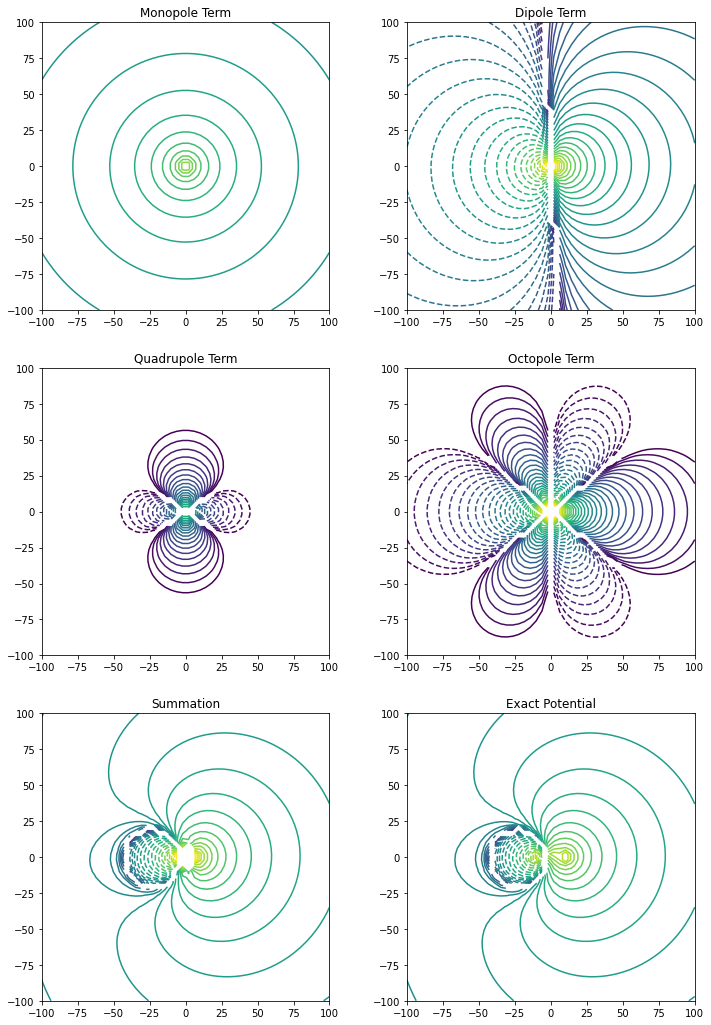

In [11]:
# Creates six pairs of axes in a 3x2 arrangement in one figure  
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))

ax1.set_aspect('equal')
ax2.set_aspect('equal')
ax3.set_aspect('equal')
ax4.set_aspect('equal')
ax5.set_aspect('equal')
ax6.set_aspect('equal')

#/

ax1.contour(x, y, np.log10(V0), levels = lvls) #vmax = logvmax,vmin = logvmin, levels = 10)
ax1.contour(x, y, np.log10(-1*V0), levels = lvls, linestyles = 'dashed') #vmax = logvmax,vmin = logvmin, levels = 10)
ax1.set_title("Monopole Term")

ax2.contour(x, y, np.log10(V1), levels = lvls) #vmax = logvmax,vmin = logvmin, levels = 10)
ax2.contour(x, y, np.log10(-1*V1),levels = lvls, linestyles = 'dashed') #vmax = logvmax,vmin = logvmin, levels = 10)
ax2.set_title("Dipole Term")

ax3.contour(x, y, np.log10(V2),levels = lvls) #vmax = logvmax,vmin = logvmin, levels = 10)
ax3.contour(x, y, np.log10(-1*V2),levels = lvls, linestyles = 'dashed') #vmax = logvmax,vmin = logvmin, levels = 10)
ax3.set_title("Quadrupole Term")

ax4.contour(x, y, np.log10(V3),levels = lvls) #vmax = logvmax,vmin = logvmin, levels = 10)
ax4.contour(x, y, np.log10(-1*V3),levels = lvls, linestyles = 'dashed') #vmax = logvmax,vmin = logvmin, levels = 10)
ax4.set_title("Octopole Term")

ax5.contour(x, y, np.log10(Vmulti), levels = lvls) #vmax = logvmax,vmin = logvmin, levels = 10)
ax5.contour(x, y, np.log10(-1*Vmulti), levels = lvls, linestyles = 'dashed') #vmax = logvmax,vmin = logvmin, levels = 10)
ax5.set_title("Summation")

# Fall 23 has students replotting exactV again to compare it to Vmulti instead of residuals. Unhash the two lines below and comment out the following two lines to revert. 

#ax6.contourf(x, y, Vmulti_sum - exactV)
#ax6.set_title("Residuals")

ax6.contour(x, y, np.log10(exactV), levels = lvls) #vmax = logvmax,vmin = logvmin, levels= 10)
ax6.contour(x, y, np.log10(-exactV), levels = lvls, linestyles = 'dashed') #vmax = logvmax,vmin = logvmin, levels = 10)
ax6.set_title("Exact Potential")

plt.savefig('./multipol.png')
plt.show()

#/

**Question: What parts of this plot work? What don't? How do you explain these issues? Where are the greatest differences between your exact plot and the multipole summation version?**

## c) Other charge distributions

Now that you've made all of the code, try out the charge distributions listed below and answer the questions. You do not need to include the plots for these distributions and, in fact, **you should turn in your code with the plots for the original charge distribution showing**.

It might help to turn your above code entirely into functions. Or you can just copy and paste what you need. 

i) Find and plot the multipole terms for a 1) single charge located at the origin and then 2) the same charge displaced from the origin. **Why do the higher-order terms appear only when the charge is displaced from the origin?**

ii) Find and plot the multipole terms for a physical dipole (two equal and opposite charges, one located at (-d/2, 0) and the other at (d/2, 0)). **Which multipole terms are zero? What happens to the terms higher than n = 3 as the separation between the two charges increases?**

iii) **What sort of charge distribution results in no monopole or dipole term but does give you a strong quadrupole term?** 

If you have time, you may wish to continue exploring multipole expansion by solving for larger numbers of charges and different distributions.